In [1]:
cd /g/data/jk72/deg581/shacom/ana/notebooks

/g/data/jk72/deg581/shacom/ana/notebooks


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/108309855.gadi-pbs'

In [3]:
# Suite for Analysis - Overview

# script needs to:
# load 1-5 variables from multiple files
# run some calculation and concatenate together
# make some plots

In [5]:


FilePath='/g/data/jk72/deg581/shacom/mdl/shackleton_repeatyear/' # Truth file settings
prefix='roms_his_'
timeRange = [7, 8]
datelist = np.array(range(timeRange[0],timeRange[1],1))

def add_zeros_to_4(date):
    if date<10:
        to_add = '000'
    elif date>9 & date<100:
        to_add = '00'
    elif date>99 & date < 1000:
        to_add = '0'
    else: 
        to_add = ''
    return to_add

def generateFileList(FilePath,prefix,datelist):
    filelist=[FilePath+prefix+add_zeros_to_4(datelist[0])+str(datelist[0])+'.nc']
    for dates in datelist[1:]:
        filenameToAppend=FilePath+prefix+add_zeros_to_4(dates)+str(dates)+'.nc'
        filelist.append(filenameToAppend)
    return filelist

fl=generateFileList(FilePath,prefix,datelist)
print(fl)

# ds=loadOverlappedNetcdfFileList(filelist=fl,overlapDays=7)

ds = xr.open_mfdataset(fl,chunks = {'ocean_time':1}, data_vars='minimal', compat='override',coords='minimal',parallel='False',join='right')

print(ds.nbytes/1e9,'G')

['/g/data/jk72/deg581/shacom/mdl/shackleton_repeatyear/roms_his_0006.nc', '/g/data/jk72/deg581/shacom/mdl/shackleton_repeatyear/roms_his_0007.nc']
22.56314984 G


In [6]:
ds = ds.drop_vars(['Tb','Sb','ubar_eastward','vbar_northward','w','shflux','ssflux','sustr','svstr'])
print(ds.nbytes/1e9,'G')
ds

18.9246634 G


<xarray.Dataset>
Dimensions:        (tracer: 2, boundary: 4, s_rho: 25, s_w: 26, eta_rho: 195,
                    xi_rho: 188, eta_u: 195, xi_u: 187, eta_v: 194, xi_v: 188,
                    eta_psi: 194, xi_psi: 187, ocean_time: 730)
Coordinates:
  * s_rho          (s_rho) float64 -0.98 -0.94 -0.9 -0.86 ... -0.1 -0.06 -0.02
  * s_w            (s_w) float64 -1.0 -0.96 -0.92 -0.88 ... -0.08 -0.04 0.0
    x_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(195, 188), meta=np.ndarray>
    y_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(195, 188), meta=np.ndarray>
    x_u            (eta_u, xi_u) float64 dask.array<chunksize=(195, 187), meta=np.ndarray>
    y_u            (eta_u, xi_u) float64 dask.array<chunksize=(195, 187), meta=np.ndarray>
    x_v            (eta_v, xi_v) float64 dask.array<chunksize=(194, 188), meta=np.ndarray>
    y_v            (eta_v, xi_v) float64 dask.array<chunksize=(194, 188), meta=np.ndarray>
    x_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(194, 187), meta=np.ndarray>
    y_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(194, 187), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2012-01-01 ... 2013-12-30
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/79)
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         datetime64[ns] ...
    nHIS           int32 ...
    ...             ...
    v              (ocean_time, s_rho, eta_v, xi_v) float32 dask.array<chunksize=(1, 25, 194, 188), meta=np.ndarray>
    u_eastward     (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    v_northward    (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    temp           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    salt           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    rho            (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
Attributes: (12/35)
    file:              roms_his_0006.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Shackleton Ice Shelf-ocean Application
    var_info:          ROMS/External/varinfo.yaml
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            016x018
    history:           ROMS/TOMS, Version 4.1, Thursday - February 15, 2024 -...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       SHACKLETON, ANA_BSFLUX, ANA_BTFLUX, ANA_SRFLUX, ASSUME...

In [7]:
ds

<xarray.Dataset>
Dimensions:        (tracer: 2, boundary: 4, s_rho: 25, s_w: 26, eta_rho: 195,
                    xi_rho: 188, eta_u: 195, xi_u: 187, eta_v: 194, xi_v: 188,
                    eta_psi: 194, xi_psi: 187, ocean_time: 730)
Coordinates:
  * s_rho          (s_rho) float64 -0.98 -0.94 -0.9 -0.86 ... -0.1 -0.06 -0.02
  * s_w            (s_w) float64 -1.0 -0.96 -0.92 -0.88 ... -0.08 -0.04 0.0
    x_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(195, 188), meta=np.ndarray>
    y_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(195, 188), meta=np.ndarray>
    x_u            (eta_u, xi_u) float64 dask.array<chunksize=(195, 187), meta=np.ndarray>
    y_u            (eta_u, xi_u) float64 dask.array<chunksize=(195, 187), meta=np.ndarray>
    x_v            (eta_v, xi_v) float64 dask.array<chunksize=(194, 188), meta=np.ndarray>
    y_v            (eta_v, xi_v) float64 dask.array<chunksize=(194, 188), meta=np.ndarray>
    x_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(194, 187), meta=np.ndarray>
    y_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(194, 187), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2012-01-01 ... 2013-12-30
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/79)
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         datetime64[ns] ...
    nHIS           int32 ...
    ...             ...
    v              (ocean_time, s_rho, eta_v, xi_v) float32 dask.array<chunksize=(1, 25, 194, 188), meta=np.ndarray>
    u_eastward     (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    v_northward    (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    temp           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    salt           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    rho            (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
Attributes: (12/35)
    file:              roms_his_0006.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Shackleton Ice Shelf-ocean Application
    var_info:          ROMS/External/varinfo.yaml
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            016x018
    history:           ROMS/TOMS, Version 4.1, Thursday - February 15, 2024 -...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       SHACKLETON, ANA_BSFLUX, ANA_BTFLUX, ANA_SRFLUX, ASSUME...

In [8]:
# special addition because x_rho and y_rho are in grd file only - update this to remove once re-run
grd = xr.open_dataset('/g/data/jk72/deg581/shackleton-setup/data/proc/shac_2km_v1_grd.nc')
ds['x_rho'] = grd.x_rho
ds['y_rho'] = grd.y_rho

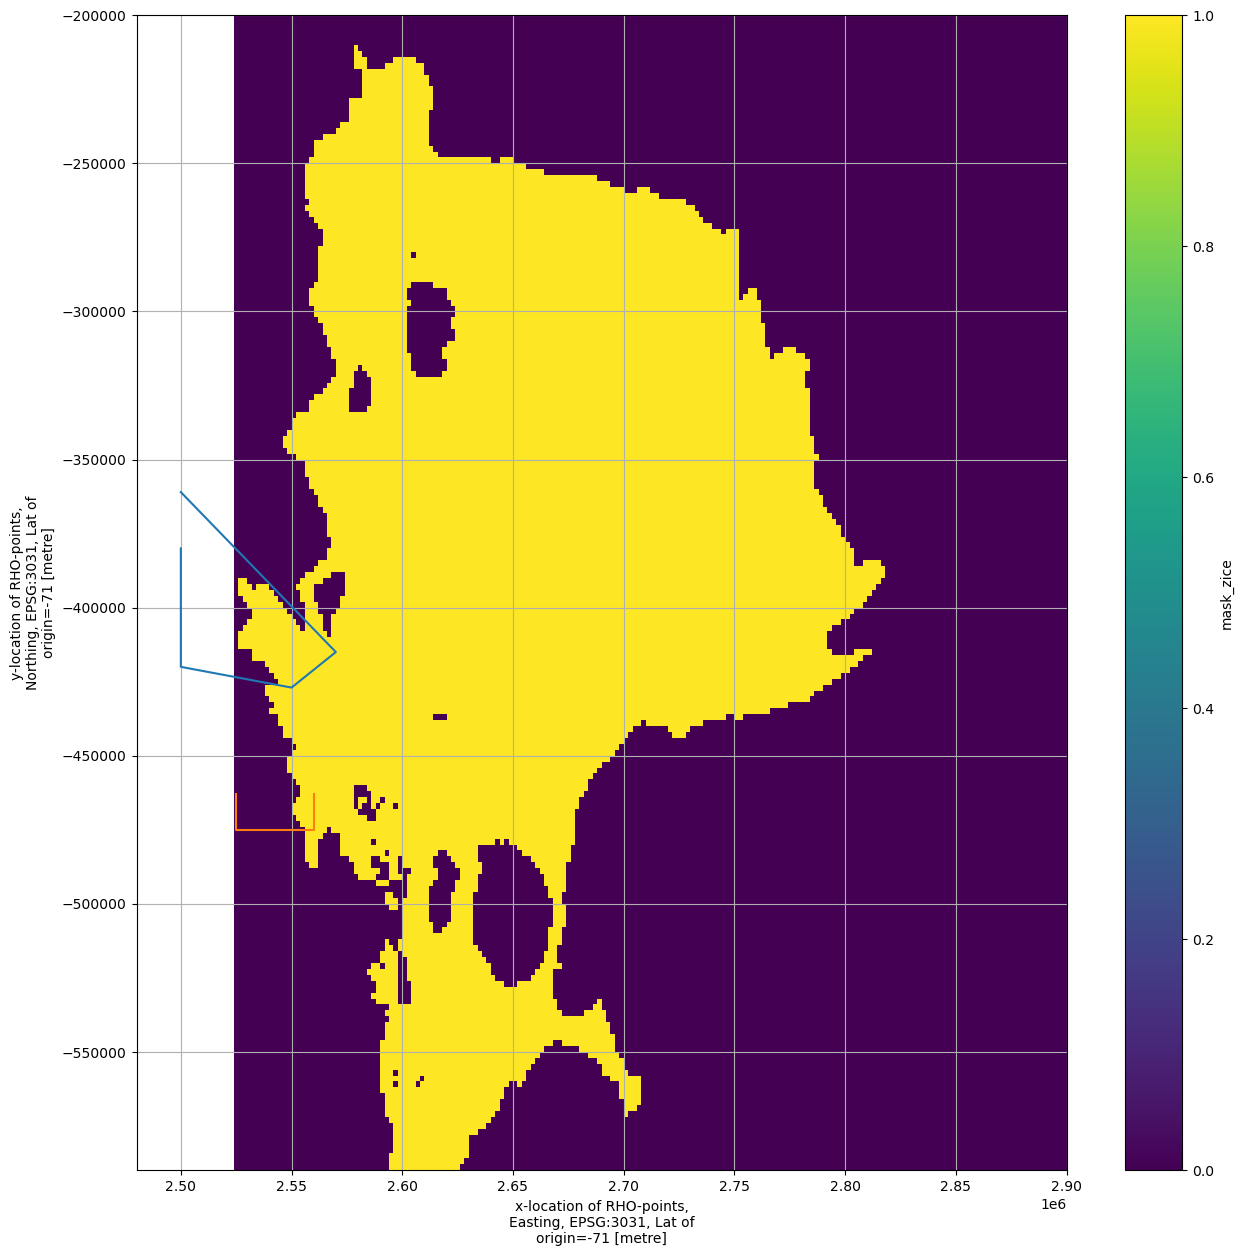

In [9]:
# make masks
ds['mask_zice'] = ((ds.zice<0)*ds.mask_rho)

# now make a ROI mask(s)
plt.figure(figsize=(15,15))
ds.mask_zice.plot(x='x_rho',y='y_rho')
plt.grid()
poly_shelf1 = np.array([
     [2.5e6,-380000],
     [2.5e6,-420000],
     [2.55e6,-427000],
     [2.57e6,-415000],
     [2.5e6,-361000]]) # denman glacier ice shelf
plt.plot(poly_shelf1[:,0],poly_shelf1[:,1])
poly_shelf2 = np.array([
     [2.525e6,-463000],
     [2.525e6,-475000],
     [2.56e6,-475000],
     [2.56e6,-463000]]) # scott glacier ice shelf
plt.plot(poly_shelf2[:,0],poly_shelf2[:,1])
plt.show()

def inpolygon(xq, yq, xv, yv):
    from matplotlib import path
    shape = xq.shape
    xq = xq.reshape(-1)
    yq = yq.reshape(-1)
    xv = xv.reshape(-1)
    yv = yv.reshape(-1)
    q = [(xq[i], yq[i]) for i in range(xq.shape[0])]
    p = path.Path([(xv[i], yv[i]) for i in range(xv.shape[0])])
    return p.contains_points(q).reshape(shape)


mask_roi1 = inpolygon(ds.x_rho.values, ds.y_rho.values,poly_shelf1[:,0], poly_shelf1[:,1])
mask_roi2 = inpolygon(ds.x_rho.values, ds.y_rho.values,poly_shelf2[:,0], poly_shelf2[:,1])

roi_label1 = 'denman'
roi_label2 = 'scott'
ds['mask_zice_roi1'] = ds.mask_zice*mask_roi1
ds.mask_zice_roi1.attrs['long_name']=roi_label1
ds['mask_zice_roi2'] = ds.mask_zice*mask_roi2
ds.mask_zice_roi2.attrs['long_name']=roi_label2

# ds.mask_zice_roi.plot()

In [10]:
# set any grid data here.

weights = (1/ds.pm)*(1/ds.pn)
weights.name = "weights"

print('making vertical coordinates')
Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = (ds.zeta+ds.zice) + ((ds.zeta+ds.zice) + ds.h) * Zo_rho
Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
z_w = Zo_w * ((ds.zeta+ds.zice) + ds.h) + (ds.zeta+ds.zice)
    
ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose('ocean_time', 's_w', 'eta_rho', 'xi_rho')
ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')
ds.coords['z_rho0'] = z_rho.mean(dim='ocean_time')
ds["z_rho0"] = ds.z_rho0.fillna(0)

ds['dz'] = (('ocean_time','s_rho', 'eta_rho', 'xi_rho'),np.diff(ds.z_w,axis=1))



making vertical coordinates


In [11]:
# make monthly and seasonal weights etc
# first monthyl

# calculate the month length for each value
month_length = ds.ocean_time.dt.days_in_month


## Calculate the weights by grouping by 'time.season'.
weights = (
    month_length.groupby("ocean_time.season") / month_length.groupby("ocean_time.season").sum()
)

## Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby("ocean_time.season").sum().values, np.ones(4))

# ## Calculate the weighted average
# ds_temp_weighted = (ds.temp * weights).groupby("ocean_time.season").sum(dim="ocean_time")
# ds_salt_weighted = (ds.salt * weights).groupby("ocean_time.season").sum(dim="ocean_time")
# ds_u_weighted = (ds.u_eastward * weights).groupby("ocean_time.season").sum(dim="ocean_time")
# ds_v_weighted = (ds.v_northward * weights).groupby("ocean_time.season").sum(dim="ocean_time")

# now make a daily climatology

ds_dailyclima = ds.groupby('ocean_time.dayofyear').mean()


# annual mean spatial conditions

In [12]:
# implement the missing value
ds['m'] = ds.m.where(ds.m<1e35,np.NaN)
ds['my'] = ds.m*(60*60*24*365)

ds_dailyclima['m'] = ds_dailyclima.m.where(ds_dailyclima.m<1e35,np.NaN)
ds_dailyclima['my'] = ds_dailyclima.m*(60*60*24*365)

In [13]:
ds_dailyclima

<xarray.Dataset>
Dimensions:         (dayofyear: 366, tracer: 2, boundary: 4, s_rho: 25,
                     s_w: 26, eta_rho: 195, xi_rho: 188, eta_u: 195, xi_u: 187,
                     eta_v: 194, xi_v: 188, eta_psi: 194, xi_psi: 187)
Coordinates:
  * s_rho           (s_rho) float64 -0.98 -0.94 -0.9 -0.86 ... -0.1 -0.06 -0.02
  * s_w             (s_w) float64 -1.0 -0.96 -0.92 -0.88 ... -0.08 -0.04 0.0
    x_rho           (eta_rho, xi_rho) float64 2.525e+06 2.527e+06 ... 2.899e+06
    y_rho           (eta_rho, xi_rho) float64 -5.89e+05 -5.89e+05 ... -2.01e+05
    x_u             (eta_u, xi_u) float64 dask.array<chunksize=(195, 187), meta=np.ndarray>
    y_u             (eta_u, xi_u) float64 dask.array<chunksize=(195, 187), meta=np.ndarray>
    x_v             (eta_v, xi_v) float64 dask.array<chunksize=(194, 188), meta=np.ndarray>
    y_v             (eta_v, xi_v) float64 dask.array<chunksize=(194, 188), meta=np.ndarray>
    x_psi           (eta_psi, xi_psi) float64 dask.array<chunksize=(194, 187), meta=np.ndarray>
    y_psi           (eta_psi, xi_psi) float64 dask.array<chunksize=(194, 187), meta=np.ndarray>
    z_rho0          (eta_rho, xi_rho, s_rho) float64 dask.array<chunksize=(195, 188, 25), meta=np.ndarray>
  * dayofyear       (dayofyear) int64 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/84)
    ntimes          (dayofyear) float64 5.256e+05 5.256e+05 ... 5.256e+05
    ndtfast         (dayofyear) float64 40.0 40.0 40.0 40.0 ... 40.0 40.0 40.0
    dt              (dayofyear) float64 60.0 60.0 60.0 60.0 ... 60.0 60.0 60.0
    dtfast          (dayofyear) float64 1.5 1.5 1.5 1.5 1.5 ... 1.5 1.5 1.5 1.5
    dstart          (dayofyear) datetime64[ns] 2007-01-01 ... 2007-01-01
    nHIS            (dayofyear) float64 1.44e+03 1.44e+03 ... 1.44e+03 1.44e+03
    ...              ...
    rho             (dayofyear, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    mask_zice       (dayofyear, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 195, 188), meta=np.ndarray>
    mask_zice_roi1  (dayofyear, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 195, 188), meta=np.ndarray>
    mask_zice_roi2  (dayofyear, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 195, 188), meta=np.ndarray>
    dz              (dayofyear, s_rho, eta_rho, xi_rho) float64 0.0 0.0 ... 13.2
    my              (dayofyear, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 195, 188), meta=np.ndarray>
Attributes: (12/35)
    file:              roms_his_0006.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Shackleton Ice Shelf-ocean Application
    var_info:          ROMS/External/varinfo.yaml
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            016x018
    history:           ROMS/TOMS, Version 4.1, Thursday - February 15, 2024 -...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       SHACKLETON, ANA_BSFLUX, ANA_BTFLUX, ANA_SRFLUX, ASSUME...

In [14]:
# map u,v to rho points
def ROMSmetricsAndGrid(ds):
    ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

    coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
        'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
        'Z':{'center':'s_rho', 'outer':'s_w'}}

    grid = Grid(ds, coords=coords, periodic=[])


    ds['pm_v'] = grid.interp(ds.pm, 'Y')
    ds['pn_u'] = grid.interp(ds.pn, 'X')
    ds['pm_u'] = grid.interp(ds.pm, 'X')
    ds['pn_v'] = grid.interp(ds.pn, 'Y')
    ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
    ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)

    ds['dx'] = 1/ds.pm
    ds['dx_u'] = 1/ds.pm_u
    ds['dx_v'] = 1/ds.pm_v
    ds['dx_psi'] = 1/ds.pm_psi

    ds['dy'] = 1/ds.pn
    ds['dy_u'] = 1/ds.pn_u
    ds['dy_v'] = 1/ds.pn_v
    ds['dy_psi'] = 1/ds.pn_psi

#     ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
#     ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
#     ds['dz_u'] = grid.interp(ds.dz, 'X')
#     ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
#     ds['dz_v'] = grid.interp(ds.dz, 'Y')
#     ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

    ds['dA'] = ds.dx * ds.dy

    metrics = {
        ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
        ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
        # ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
        ('X', 'Y'): ['dA'] # Areas
    }
    grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])

    return ds,grid


ds_dailyclima, grid = ROMSmetricsAndGrid(ds_dailyclima)

ds_dailyclima['u_rho'] = grid.interp(ds_dailyclima.u,'X')

ds_dailyclima['v_rho'] = grid.interp(ds_dailyclima.v,'Y')

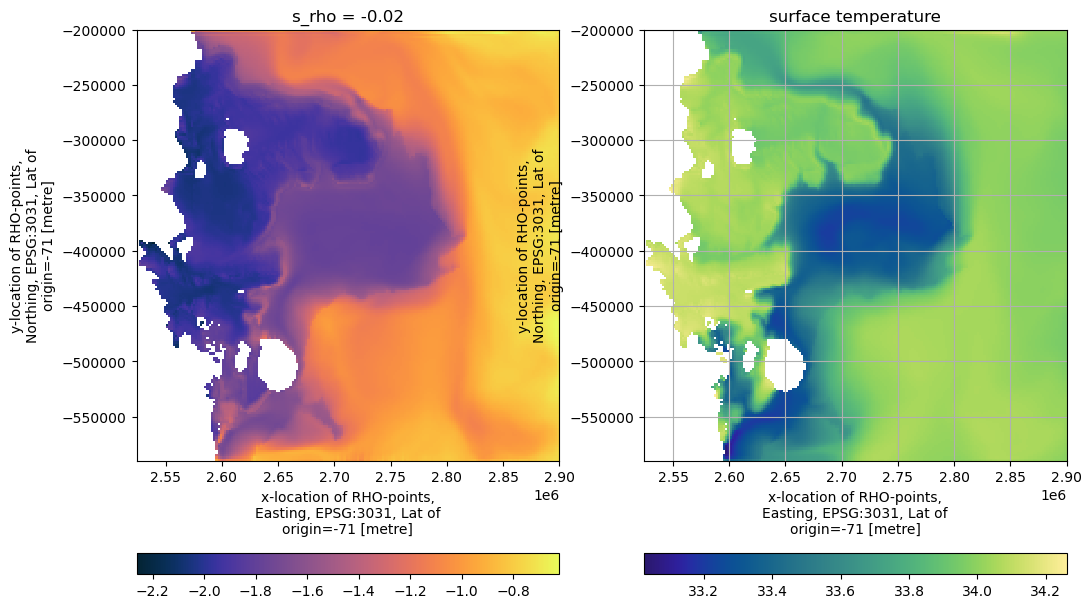

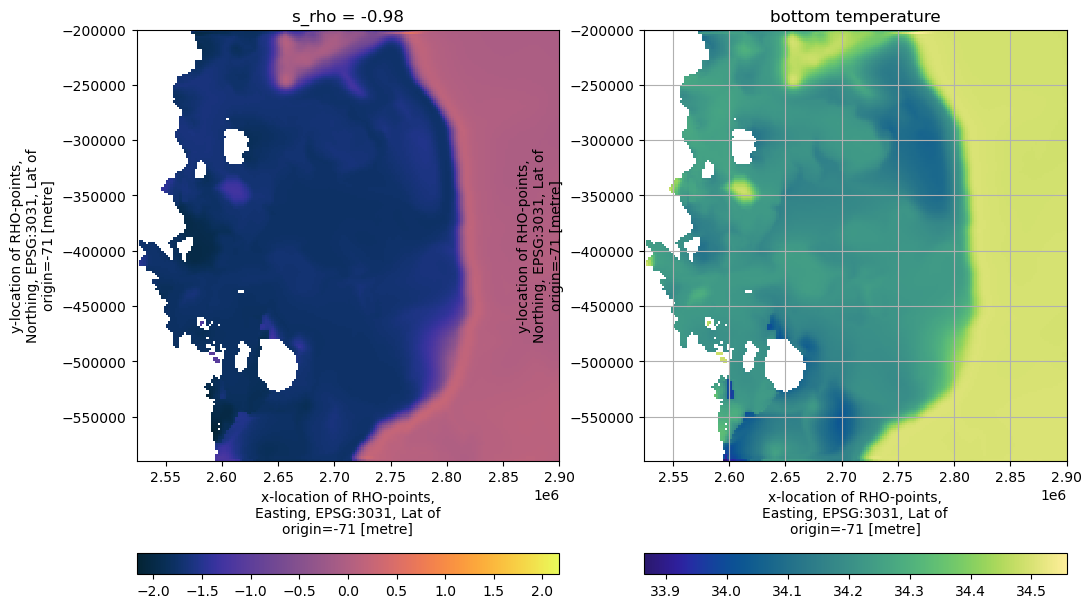

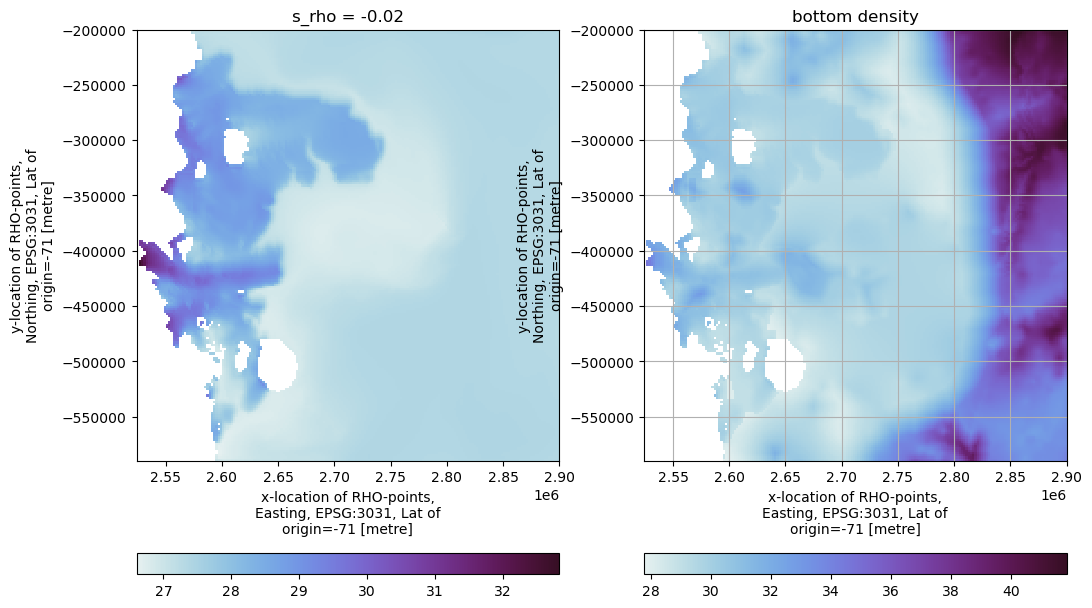

In [15]:

fig,axs=plt.subplots(ncols=2,figsize=(12,8))
ax = axs[0]
im=(ds_dailyclima.temp).isel(s_rho=-1).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False)
plt.colorbar(im,orientation='horizontal')
ax = axs[1]
im=(ds_dailyclima.salt).isel(s_rho=-1).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False)
plt.colorbar(im,orientation='horizontal')
plt.title('surface temperature')
plt.grid()
plt.show()

fig,axs=plt.subplots(ncols=2,figsize=(12,8))
ax = axs[0]
im=(ds_dailyclima.temp).isel(s_rho=0).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False)
plt.colorbar(im,orientation='horizontal')
ax = axs[1]
im=(ds_dailyclima.salt).isel(s_rho=0).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',add_colorbar=False)
plt.colorbar(im,orientation='horizontal')
plt.title('bottom temperature')
plt.grid()
plt.show()

fig,axs=plt.subplots(ncols=2,figsize=(12,8))
ax = axs[0]
im=(ds_dailyclima.rho).isel(s_rho=-1).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.dense',add_colorbar=False)
plt.colorbar(im,orientation='horizontal')
plt.title('surface density')
ax = axs[1]
im=(ds_dailyclima.rho).isel(s_rho=0).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.dense',add_colorbar=False)
plt.colorbar(im,orientation='horizontal')
plt.title('bottom density')
plt.grid()
plt.show()

In [16]:
# plt.quiver(grd.lon_rho[0:-1:res,0:-1:res],grd.lat_rho[0:-1:res,0:-1:res], ds_dailyclima.u_rho.isel(s_rho=-1).mean(dim='dayofyear')[0:-1:res,0:-1:res], ds_dailyclima.v_rho.isel(s_rho=-1).mean(dim='dayofyear')[0:-1:res,0:-1:res],angles='uv')
plt.show()

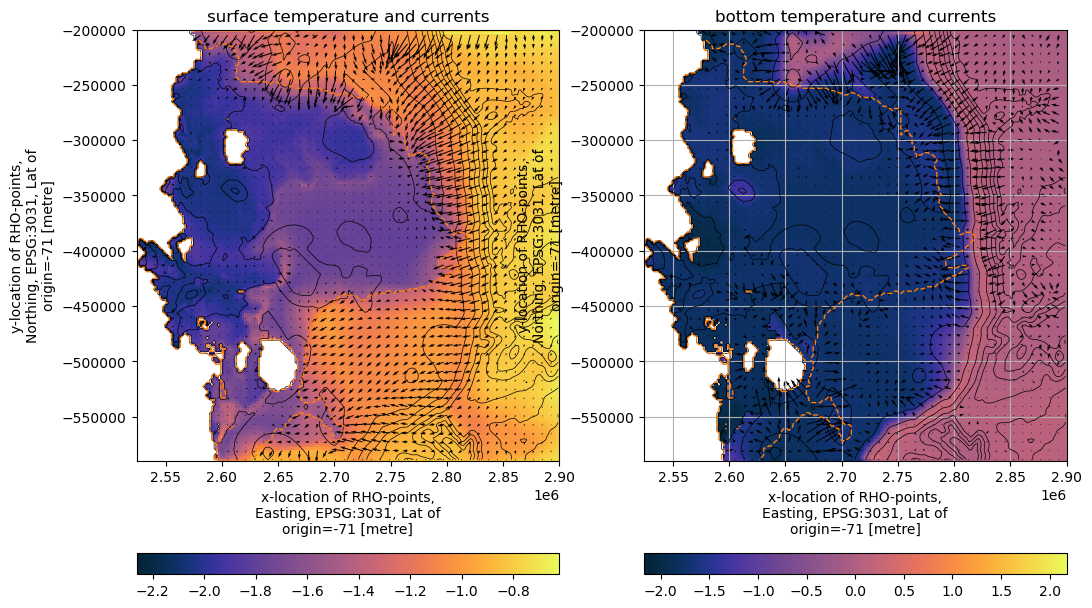

In [17]:
res=4

fig,axs=plt.subplots(ncols=2,figsize=(12,8))
ax = axs[0]
im=(ds_dailyclima.temp).isel(s_rho=-1).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False)
(ds.h*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=np.arange(0,2500,250),colors='k',linewidths=0.5)
(ds.zice*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=[-1,0],colors='C1',linewidths=1)
plt.colorbar(im,orientation='horizontal')
ax.quiver(ds.x_rho[0:-1:res,0:-1:res],ds.y_rho[0:-1:res,0:-1:res], ds_dailyclima.u_eastward.isel(s_rho=-1).mean(dim='dayofyear')[0:-1:res,0:-1:res], ds_dailyclima.v_northward.isel(s_rho=-1).mean(dim='dayofyear')[0:-1:res,0:-1:res],angles='uv')
ax.set_title('surface temperature and currents')
plt.grid()
ax = axs[1]
im=(ds_dailyclima.temp).isel(s_rho=0).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False)
(ds.h*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=np.arange(0,2500,250),colors='k',linewidths=0.5)
(ds.zice*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=[-1,0],colors='C1',linewidths=1)
plt.colorbar(im,orientation='horizontal')
ax.quiver(ds.x_rho[0:-1:res,0:-1:res],ds.y_rho[0:-1:res,0:-1:res], ds_dailyclima.u_eastward.isel(s_rho=0).mean(dim='dayofyear')[0:-1:res,0:-1:res], ds_dailyclima.v_northward.isel(s_rho=0).mean(dim='dayofyear')[0:-1:res,0:-1:res],angles='uv')
ax.set_title('bottom temperature and currents')
plt.grid()
plt.show()


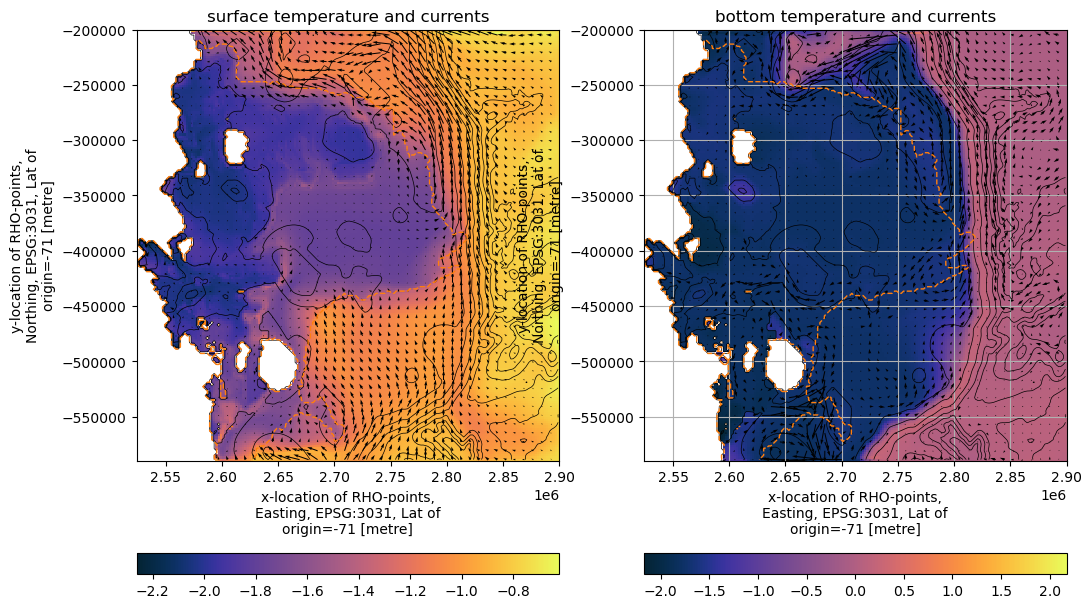

In [18]:
res=4

fig,axs=plt.subplots(ncols=2,figsize=(12,8))
ax = axs[0]
im=(ds_dailyclima.temp).isel(s_rho=-1).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False)
(ds.h*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=np.arange(0,2500,250),colors='k',linewidths=0.5)
(ds.zice*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=[-1,0],colors='C1',linewidths=1)
plt.colorbar(im,orientation='horizontal')
ax.quiver(ds.x_rho[0:-1:res,0:-1:res],ds.y_rho[0:-1:res,0:-1:res], ds_dailyclima.u_rho.isel(s_rho=-1).mean(dim='dayofyear')[0:-1:res,0:-1:res], ds_dailyclima.v_rho.isel(s_rho=-1).mean(dim='dayofyear')[0:-1:res,0:-1:res],angles='uv')
ax.set_title('surface temperature and currents')
plt.grid()
ax = axs[1]
im=(ds_dailyclima.temp).isel(s_rho=0).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False)
(ds.h*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=np.arange(0,2500,250),colors='k',linewidths=0.5)
(ds.zice*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=[-1,0],colors='C1',linewidths=1)
plt.colorbar(im,orientation='horizontal')
ax.quiver(ds.x_rho[0:-1:res,0:-1:res],ds.y_rho[0:-1:res,0:-1:res], ds_dailyclima.u_rho.isel(s_rho=0).mean(dim='dayofyear')[0:-1:res,0:-1:res], ds_dailyclima.v_rho.isel(s_rho=0).mean(dim='dayofyear')[0:-1:res,0:-1:res],angles='uv')
ax.set_title('bottom temperature and currents')
plt.grid()
plt.show()


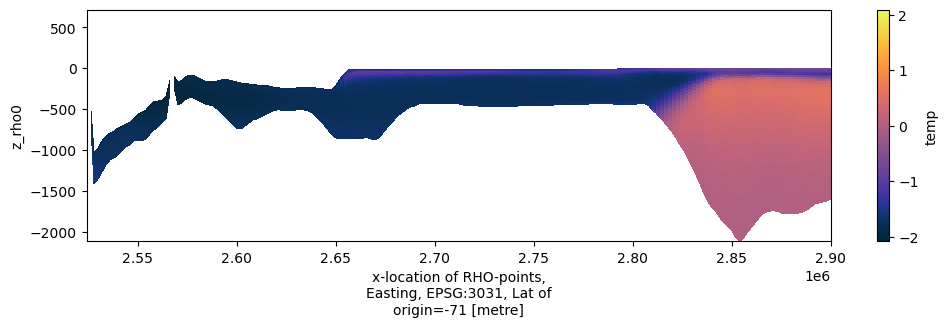

In [30]:
fig,ax=plt.subplots(ncols=1,figsize=(12,3))
im=(ds_dailyclima.temp).mean(dim='dayofyear').isel(eta_rho=90).plot(ax=ax,x='x_rho',y='z_rho0',cmap='cmo.thermal')


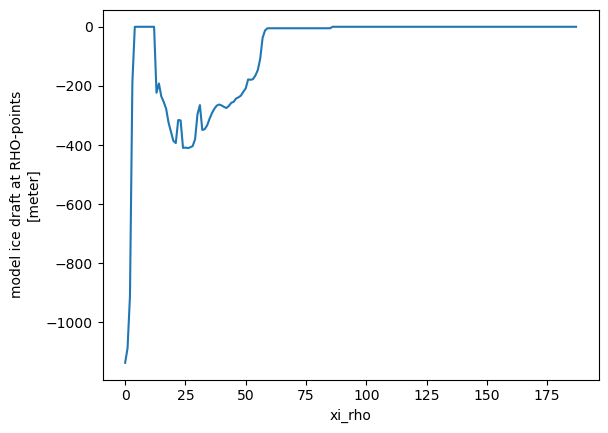

In [34]:
grd.isel(eta_rho=70).zice.plot()

(-1000.0, 0.0)

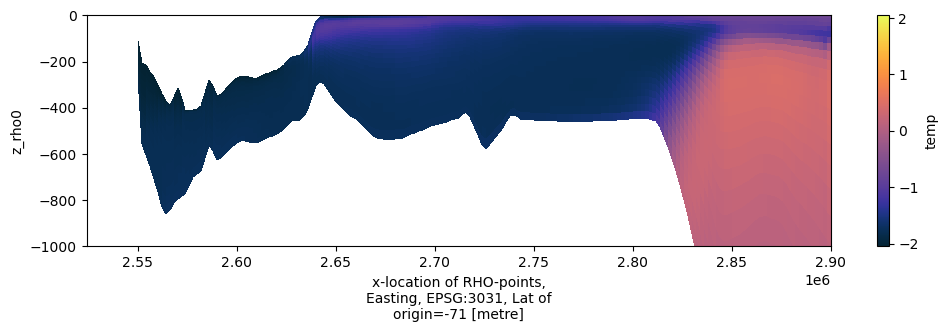

In [38]:
fig,ax=plt.subplots(ncols=1,figsize=(12,3))
im=(ds_dailyclima.temp).mean(dim='dayofyear').isel(eta_rho=70).plot(ax=ax,x='x_rho',y='z_rho0',cmap='cmo.thermal')
ax.set_ylim((-1000,0))

(-1000.0, 0.0)

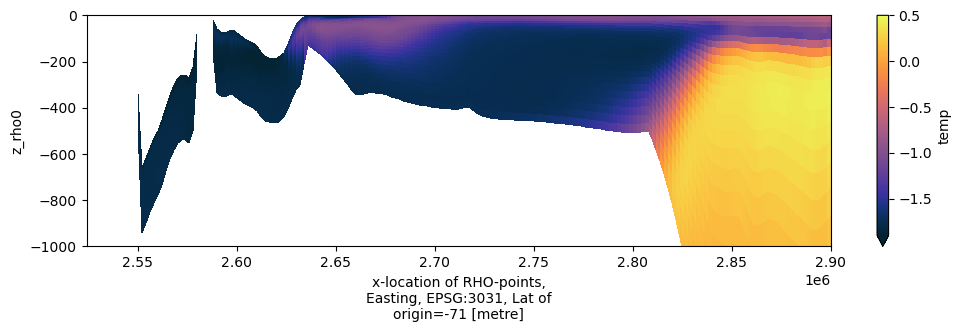

In [42]:
fig,ax=plt.subplots(ncols=1,figsize=(12,3))
im=(ds_dailyclima.temp).mean(dim='dayofyear').isel(eta_rho=60).plot(ax=ax,x='x_rho',y='z_rho0',cmap='cmo.thermal',vmin=-1.9,vmax=0.5)
ax.set_ylim((-1000,0))

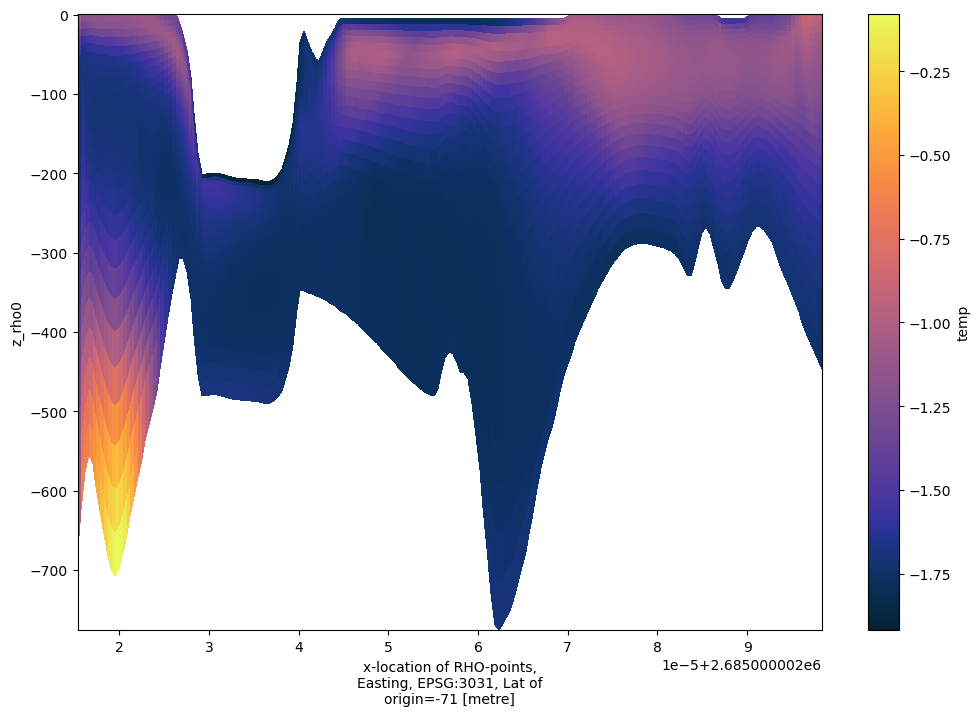

In [22]:
fig,ax=plt.subplots(ncols=1,figsize=(12,8))
im=(ds_dailyclima.temp).mean(dim='dayofyear').isel(xi_rho=80).plot(ax=ax,x='x_rho',y='z_rho0',cmap='cmo.thermal')


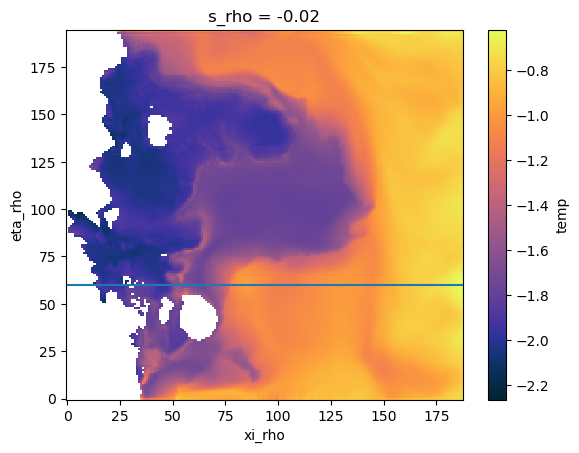

In [41]:
im=(ds_dailyclima.temp).isel(s_rho=-1).mean(dim='dayofyear').plot(cmap='cmo.thermal')
plt.axhline(y=60)

# Movies

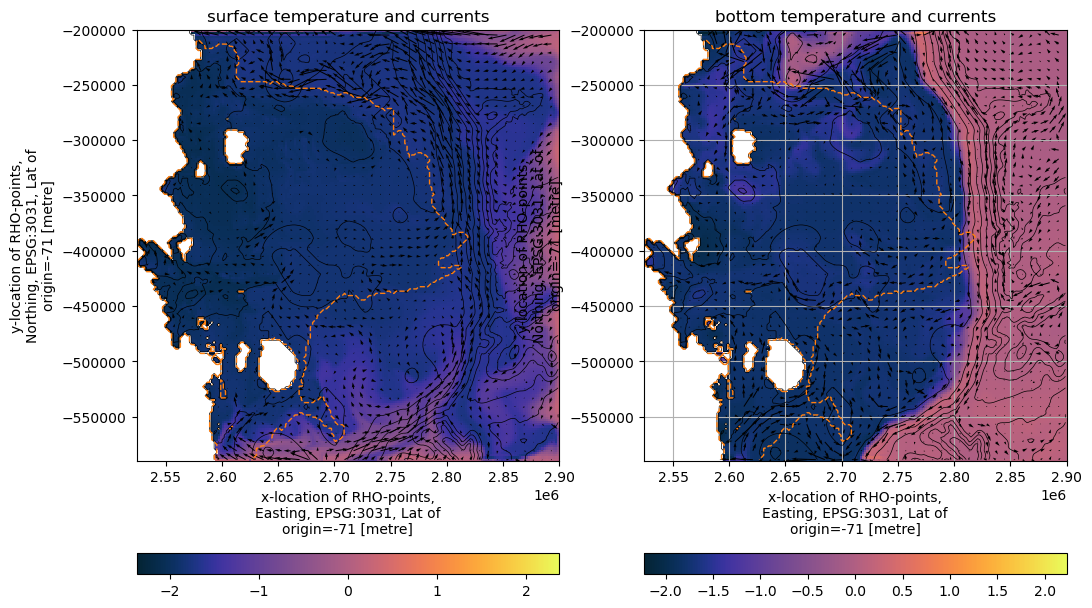

In [45]:
res=4
frame=0


fig,axs=plt.subplots(ncols=2,figsize=(12,8))
ax = axs[0]
im=(ds_dailyclima.temp).isel(s_rho=-1).isel(dayofyear=frame).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False)
(ds.h*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=np.arange(0,2500,250),colors='k',linewidths=0.5)
(ds.zice*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=[-1,0],colors='C1',linewidths=1)
plt.colorbar(im,orientation='horizontal')
ax.quiver(ds.x_rho[0:-1:res,0:-1:res],ds.y_rho[0:-1:res,0:-1:res], ds_dailyclima.u_rho.isel(s_rho=-1).isel(dayofyear=frame)[0:-1:res,0:-1:res], ds_dailyclima.v_rho.isel(s_rho=-1).isel(dayofyear=frame)[0:-1:res,0:-1:res],angles='uv')
ax.set_title('surface temperature and currents')
plt.grid()
ax = axs[1]
im=(ds_dailyclima.temp).isel(s_rho=0).isel(dayofyear=frame).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False)
(ds.h*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=np.arange(0,2500,250),colors='k',linewidths=0.5)
(ds.zice*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=[-1,0],colors='C1',linewidths=1)
plt.colorbar(im,orientation='horizontal')
ax.quiver(ds.x_rho[0:-1:res,0:-1:res],ds.y_rho[0:-1:res,0:-1:res], ds_dailyclima.u_rho.isel(s_rho=0).isel(dayofyear=frame)[0:-1:res,0:-1:res], ds_dailyclima.v_rho.isel(s_rho=0).isel(dayofyear=frame)[0:-1:res,0:-1:res],angles='uv')
ax.set_title('bottom temperature and currents')
plt.grid()
plt.show()


In [ ]:
import matplotlib.animation as animation

res=4
frame=0

fig,axs=plt.subplots(ncols=2,figsize=(12,8))
ax = axs[0]
im1=(ds_dailyclima.temp).isel(s_rho=-1).isel(dayofyear=frame).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False)
(ds.h*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=np.arange(0,2500,250),colors='k',linewidths=0.5)
(ds.zice*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=[-1,0],colors='C1',linewidths=1)
plt.colorbar(im,orientation='horizontal')
ax.quiver(ds.x_rho[0:-1:res,0:-1:res],ds.y_rho[0:-1:res,0:-1:res], ds_dailyclima.u_rho.isel(s_rho=-1).isel(dayofyear=frame)[0:-1:res,0:-1:res], ds_dailyclima.v_rho.isel(s_rho=-1).isel(dayofyear=frame)[0:-1:res,0:-1:res],angles='uv')
ax.set_title('surface temperature and currents')
plt.grid()
ax = axs[1]
im2=(ds_dailyclima.temp).isel(s_rho=0).isel(dayofyear=frame).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.thermal',add_colorbar=False)
(ds.h*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=np.arange(0,2500,250),colors='k',linewidths=0.5)
(ds.zice*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=[-1,0],colors='C1',linewidths=1)
plt.colorbar(im,orientation='horizontal')
ax.quiver(ds.x_rho[0:-1:res,0:-1:res],ds.y_rho[0:-1:res,0:-1:res], ds_dailyclima.u_rho.isel(s_rho=0).isel(dayofyear=frame)[0:-1:res,0:-1:res], ds_dailyclima.v_rho.isel(s_rho=0).isel(dayofyear=frame)[0:-1:res,0:-1:res],angles='uv')
ax.set_title('bottom temperature and currents')
plt.grid()
plt.close()

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    im1.set_array((ds_dailyclima.temp).isel(s_rho=-1).isel(dayofyear=frame).values.flatten())
    ax.set_title("Time = " + str(ds_dailyclima.coords['dayofyear'].values[frame]))
    im2.set_array((ds_dailyclima.temp).isel(s_rho=0).isel(dayofyear=frame).values.flatten())
# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=365,       # Could also be iterable or list
    interval=200     # ms between frames
)

from IPython.display import HTML
HTML(ani.to_jshtml())


Animation size has reached 21601373 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


In [ ]:
import matplotlib.animation as animation

temp=frc.temp_south
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))
# Plot the initial frame.
cax = plt.pcolormesh(ds.x_rho.isel(eta_rho=0),ds.z_rho0.isel(eta_rho=0),temp.isel(temp_time=3),
    cmap='cmo.thermal',
    vmin=-2, vmax=0,
)
plt.colorbar(extend='neither')
plt.close()
# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(temp.isel(temp_time=frame).values.flatten())
    ax.set_title("Time = " + str(temp.coords['temp_time'].values[frame]))
# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=12,       # Could also be iterable or list
    interval=200     # ms between frames
)

from IPython.display import HTML
HTML(ani.to_jshtml())

# MKE EKE

calc velocity anomalies
calc eke


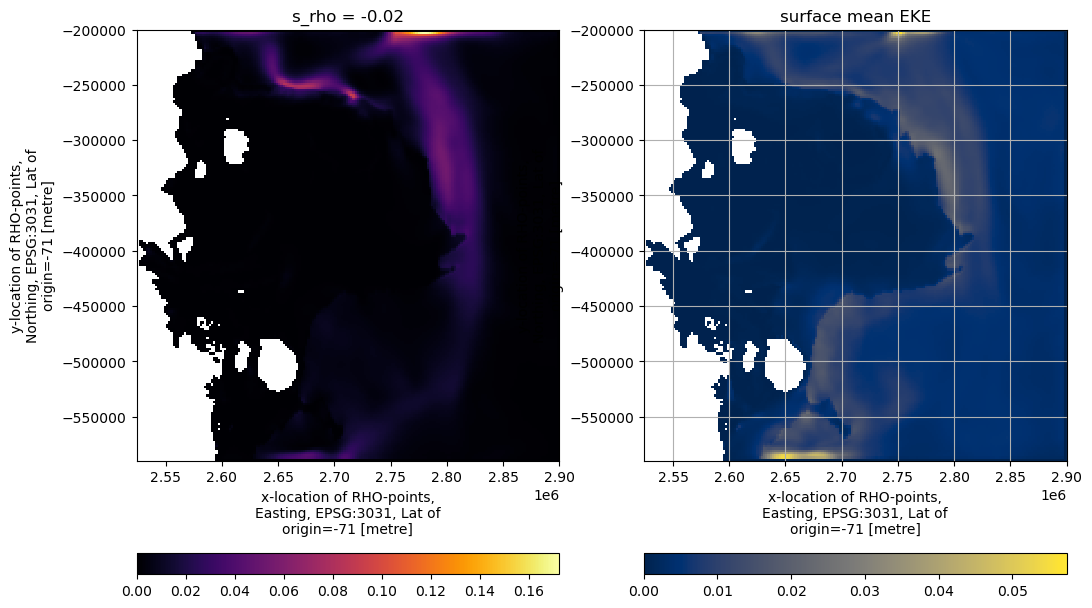

In [23]:
# MKE and EKE oer analysis period

u_bar = ds.u_eastward.mean("ocean_time")
v_bar = ds.v_northward.mean("ocean_time")
mke = 0.5*(u_bar**2 + v_bar**2)

ds["mke"] = mke


u_bar = ds.u_eastward.mean("ocean_time")
v_bar = ds.v_northward.mean("ocean_time")

print('calc velocity anomalies')
u_prime = ds.u_eastward - u_bar
v_prime = ds.v_northward - v_bar

print('calc eke')
eke = 0.5*(u_prime**2 + v_prime**2)

ds["eke"] = eke



fig,axs=plt.subplots(ncols=2,figsize=(12,8))
ax = axs[0]
im=ds.mke.isel(s_rho=-1).plot(ax=ax,x='x_rho',y='y_rho',cmap='inferno',add_colorbar=False)
plt.colorbar(im,orientation='horizontal')
plt.title('surface MKE')
ax = axs[1]
im=ds.eke.isel(s_rho=-1).mean(dim='ocean_time').plot(ax=ax,x='x_rho',y='y_rho',cmap='cividis',add_colorbar=False)
plt.colorbar(im,orientation='horizontal')
plt.title('surface mean EKE')
plt.grid()
plt.show()



In [ ]:
# to do

#look at a netcdf output file. What is the direction of flow? is there a shelf current?

#streamline plot - does that show same circulation?

# is the calculation of angle correct?
# Calculate the grid angle. !Important!

# angle = lon_rho/180.0*np.pi
# ^^ only works for the polar stereographic grid of the Ole style WAOM model.

# From Charles James GridBuilder:

_,dxdxi = np.gradient(grd.lon_rho)
_,dydxi = np.gradient(grd.lat_rho)

angle = np.arctan2(dydxi,dxdxi)
print('I''m really not sure if this is correct!')

In [ ]:
plt.pcolormesh(angle)
plt.colorbar()
plt.show()
plt.pcolormesh(grd.lon_rho/180*np.pi)
plt.colorbar()
plt.show()

In [ ]:
STOP

In [ ]:
# time evolution of melt rate
plt.figure(figsize=(8,4))
(ds.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).weighted(weights).mean(('eta_rho','xi_rho')).plot(linewidth=1,label='total')
(ds.my*ds.mask_zice_roi1.where(ds.mask_zice_roi1,np.NaN)).weighted(weights).mean(('eta_rho','xi_rho')).plot(linewidth=1,label='denman')
plt.legend(frameon=False)
plt.title('melt rate evolution')
plt.grid()
plt.show()


In [ ]:
(ds.my*ds.mask_zice_roi1.where(ds.mask_zice_roi1,np.NaN)).weighted(weights).mean(('eta_rho','xi_rho')).plot(linewidth=1,label='denman')

In [ ]:
(ds_dailyclima.my*ds.mask_zice_roi1.where(ds.mask_zice_roi1,np.NaN)).weighted(weights).mean(('eta_rho','xi_rho')).mean(dim='ocean_time').plot(linewidth=1,label='roi')

In [ ]:
STOP